# Prediksi Gerhana Matahari Cincin 2019 Indonesia

In [1]:
import numpy as np

import pytz
import datetime

from astropy import units as u
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, get_sun, get_moon

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

# Siak, RIAU

Misalkan akan melakukan pengamatan di Siak, Riau. Dari kabar burung, gerhana akan terjadi pada tanggal 26 Desember 2019 pukul 12:10 WIB

In [3]:
siak = EarthLocation.of_address('istana siak')
tz = pytz.timezone('Asia/Jakarta')
waktu_tebakan = Time(tz.localize(datetime.datetime(2019,12, 26, 12, 10, 0)))

Buat objek bulan dan matahari untuk lokasi dan waktu di atas

In [4]:
altAzframe = AltAz(obstime=waktu_tebakan, location=siak)

matahariAltAz = get_sun(waktu_tebakan).transform_to(altAzframe)
bulanAltAz = get_moon(waktu_tebakan).transform_to(altAzframe)

separasi = matahariAltAz.separation(bulanAltAz).to(u.arcmin)
separasi

<Angle 3.86178049 arcmin>

Hitung ukuran diameter sudut Matahari dan Bulan. Di dalam paket astropy sudah ada radius Matahari, kita harus tetap menghitung ukuran diameter sudut bulan. Di laman   [Wikipedia](https://en.wikipedia.org/wiki/Moon) kita bisa menghitung radius rata-rata.

In [5]:
from astropy import constants

R_matahari = constants.R_sun
R_bulan = 1737.1 * u.km

def ukuran_tampak(R, jarak):
    return (R/jarak).to(u.arcmin, u.dimensionless_angles())

In [6]:
ukuranMatahari = ukuran_tampak(R_matahari, matahariAltAz.distance)
ukuranMatahari

<Quantity 16.25611397 arcmin>

In [7]:
ukuranBulan = ukuran_tampak(R_bulan, bulanAltAz.distance)
ukuranBulan

<Quantity 15.78046117 arcmin>

Plot posisi bulan dan matahari untuk lokasi dan waktu di atas

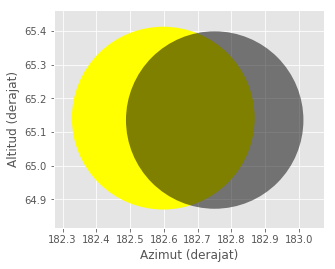

In [9]:
lingkaranMatahari = plt.Circle((matahariAltAz.az.deg, matahariAltAz.alt.deg), 
                        ukuranMatahari.to(u.deg).value,
                        fc='yellow')
lingkaranBulan = plt.Circle((bulanAltAz.az.deg, bulanAltAz.alt.deg), 
                         ukuranBulan.to(u.deg).value,
                         fc='black', alpha=.5)

ax = plt.subplot(aspect=1)
ax.add_patch(lingkaranMatahari)
ax.add_patch(lingkaranBulan)
jarakTerbesar = max(separasi.deg, ukuranMatahari.to(u.deg).value, ukuranBulan.to(u.deg).value)
plt.xlim(matahariAltAz.az.deg-jarakTerbesar*1.2, bulanAltAz.az.deg+jarakTerbesar*1.2)
plt.ylim(matahariAltAz.alt.deg-jarakTerbesar*1.2, bulanAltAz.alt.deg+jarakTerbesar*1.2)

plt.xlabel('Azimut (derajat)')
plt.ylabel('Altitud (derajat)');

Plot di atas menunjukkan terjadinya gerhana sebagian. Sepertinya kabar burung yang sampai kurang akurat. Mari kita menghitung jarak sudut antara Matahari dan Bulan di sekitar waktu yang kita dengar

Buat fungsi untuk menghitung posisi bulan dan matahari dan jarak separasi satu sama lain

In [10]:
def matahariBulan(waktu, lokasi):
    altAzframe = AltAz(obstime=waktu, location=lokasi)
    matahariAltAz = get_sun(waktu).transform_to(altAzframe)
    bulanAltAz = get_moon(waktu).transform_to(altAzframe)
    separasi = matahariAltAz.separation(bulanAltAz)
    
    return separasi, matahariAltAz, bulanAltAz

Text(0.5, 0, 'Waktu(UTC)')

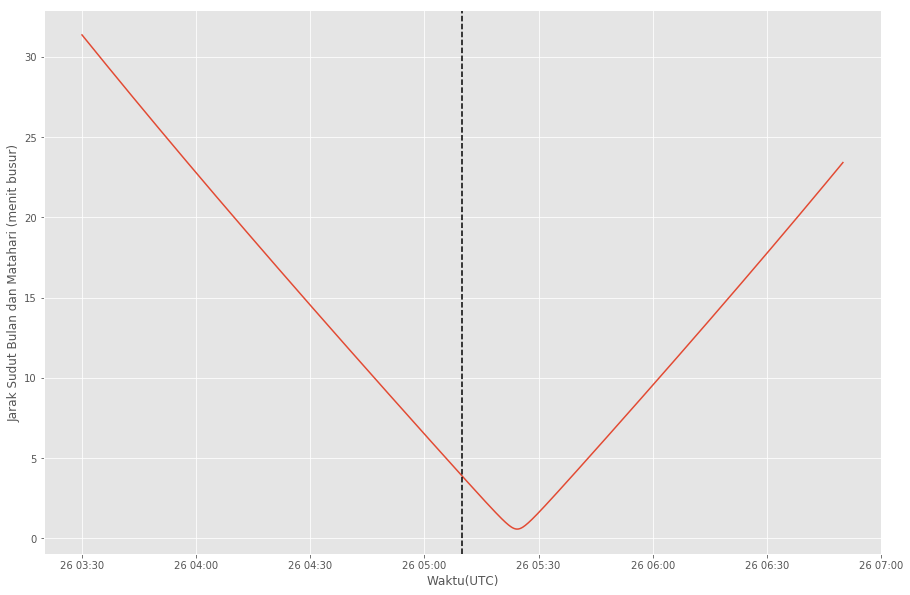

In [12]:
rentangWaktu = waktu_tebakan + np.linspace(-100, 100, 1000)*u.min

separasi, matahariAltAz, bulanAltAz = matahariBulan(rentangWaktu, siak)

plt.figure(figsize=(15, 10))
plt.plot_date(rentangWaktu.plot_date, separasi.arcmin, fmt='-')
plt.axvline(waktu_tebakan.plot_date, c='k', ls='--')
plt.ylabel('Jarak Sudut Bulan dan Matahari (menit busur)')
plt.xlabel('Waktu(UTC)')

Dari grafik di atas perkiraan waktu dari kabar burung bergeser sekitar 15 menit. Kita dapat mencari minimum dari grafik di atas untuk menentukan puncak gerhana

In [13]:
puncakGerhana = rentangWaktu[np.argmin(matahariAltAz.separation(bulanAltAz).arcmin)]
puncakGerhana

<Time object: scale='utc' format='datetime' value=2019-12-26 05:24:18.858859>

Mari kita plot lagi posisi Bulan dan Matahari dengan waktu puncak gerhana

Text(0, 0.5, 'Altitud (derajat)')

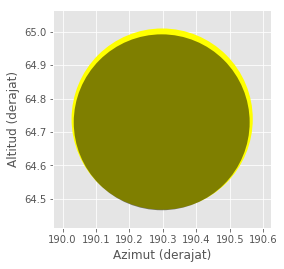

In [14]:
separasi, matahariAltAz, bulanAltAz = matahariBulan(puncakGerhana, siak)

lingkaranMatahari = plt.Circle((matahariAltAz.az.deg, matahariAltAz.alt.deg), 
                        ukuranMatahari.to(u.deg).value,
                        fc='yellow')
lingkaranBulan = plt.Circle((bulanAltAz.az.deg, bulanAltAz.alt.deg), 
                         ukuranBulan.to(u.deg).value,
                         fc='black', alpha=.5)

ax = plt.subplot(aspect=1)
ax.add_patch(lingkaranMatahari)
ax.add_patch(lingkaranBulan)
jarakTerbesar = max(separasi.deg, ukuranMatahari.to(u.deg).value, ukuranBulan.to(u.deg).value)
plt.xlim(matahariAltAz.az.deg-jarakTerbesar*1.2, matahariAltAz.az.deg+jarakTerbesar*1.2)
plt.ylim(matahariAltAz.alt.deg-jarakTerbesar*1.2, matahariAltAz.alt.deg+jarakTerbesar*1.2)

plt.xlabel('Azimut (derajat)')
plt.ylabel('Altitud (derajat)')

Yay!!!!!! Ternyata di daerah tersebut memang terjadi gerhana matahari cincin, tapi bulannya tidak tepat di tengah matahari. Mari kita cari lokasi lain.

# Pulau Penyengat

Kata Bu Wiwin, ada pulau yang sudah disurvey dan akan dilewati puncak gerhana

In [15]:
penyengat  = EarthLocation.of_address('pulau penyengat')

Text(0, 0.5, 'Altitud (derajat)')

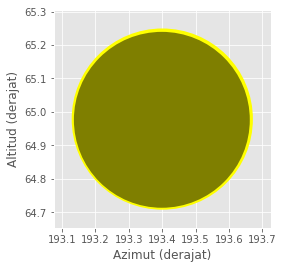

In [16]:
penyengat  = EarthLocation.of_address('pulau penyengat')
rentangWaktu = waktu_tebakan + np.linspace(-100, 100, 1000)*u.min
separasi, matahariAltAz, bulanAltAz = matahariBulan(rentangWaktu, penyengat)

puncakGerhana = rentangWaktu[np.argmin(matahariAltAz.separation(bulanAltAz).arcmin)]
separasi, matahariAltAz, bulanAltAz = matahariBulan(puncakGerhana, penyengat)

lingkaranMatahari = plt.Circle((matahariAltAz.az.deg, matahariAltAz.alt.deg), 
                        ukuranMatahari.to(u.deg).value,
                        fc='yellow')
lingkaranBulan = plt.Circle((bulanAltAz.az.deg, bulanAltAz.alt.deg), 
                         ukuranBulan.to(u.deg).value,
                         fc='black', alpha=.5)

ax = plt.subplot(aspect=1)
ax.add_patch(lingkaranMatahari)
ax.add_patch(lingkaranBulan)
jarakTerbesar = max(separasi.deg, ukuranMatahari.to(u.deg).value, ukuranBulan.to(u.deg).value)
plt.xlim(matahariAltAz.az.deg-jarakTerbesar*1.2, matahariAltAz.az.deg+jarakTerbesar*1.2)
plt.ylim(matahariAltAz.alt.deg-jarakTerbesar*1.2, matahariAltAz.alt.deg+jarakTerbesar*1.2)

plt.xlabel('Azimut (derajat)')
plt.ylabel('Altitud (derajat)')

Pas!!! Pulau penyengat dapat gambar cincin ketika puncak gerhana.

Mari kita mencari waktu puncak gerhana

Mari mencari awal dan akhir peristiwa gerhana matahari cincin

In [17]:
rentangWaktu = puncakGerhana + np.linspace(-60, 60, 100)*u.min
separasi, matahariAltAz, bulanAltAz = matahariBulan(rentangWaktu, penyengat)
waktu_tebakan = rentangWaktu[np.argmin(separasi)]
rentangWaktu = waktu_tebakan + np.linspace(-5, 5, 500)*u.min
separasi, matahariAltAz, bulanAltAz = matahariBulan(rentangWaktu, penyengat)


(0, 1.1910927274674192)

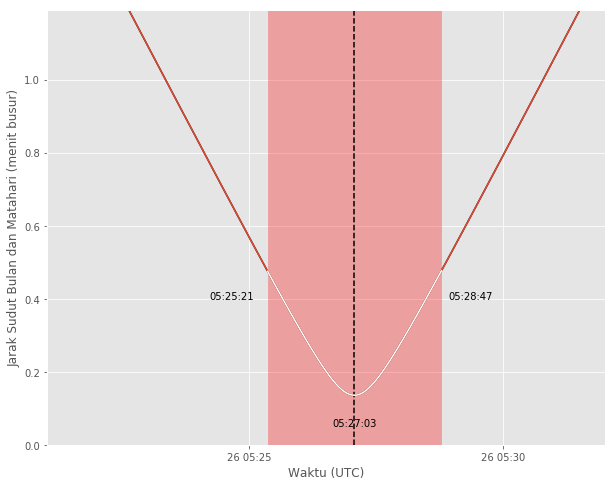

In [18]:
sep = separasi
puncakGerhana = rentangWaktu[np.argmin(matahariAltAz.separation(bulanAltAz).arcmin)]

ukuranBulan = ukuran_tampak(R_bulan, bulanAltAz.distance)
ukuraMatahari = ukuran_tampak(R_matahari, matahariAltAz.distance)

cincin = sep < (ukuranMatahari - ukuranBulan)
sebagian = sep < (ukuranMatahari + ukuranBulan)

plt.figure(figsize=(10, 8))
plt.axvline(puncakGerhana.plot_date, c='k', ls='--')
plt.axvspan(rentangWaktu.plot_date[cincin].min(), rentangWaktu.plot_date[cincin].max(), color='red', alpha=0.3)
plt.plot_date(rentangWaktu.plot_date, sep.arcmin, fmt='-', c='k')
plt.plot_date(rentangWaktu.plot_date[sebagian], sep.arcmin[sebagian], fmt='-')
plt.plot_date(rentangWaktu.plot_date[cincin], sep.arcmin[cincin], fmt='-', color='white')
plt.text(rentangWaktu.plot_date[cincin].min()-0.0008, 0.4, np.min(rentangWaktu[cincin]).strftime('%H:%M:%S'))
plt.text(rentangWaktu.plot_date[cincin].max()+0.0001, 0.4, np.max(rentangWaktu[cincin]).strftime('%H:%M:%S'))
plt.text(puncakGerhana.plot_date-0.0003, 0.05, puncakGerhana.strftime('%H:%M:%S'))
plt.ylabel('Jarak Sudut Bulan dan Matahari (menit busur)')
plt.xlabel('Waktu (UTC)')
plt.ylim(0, sep.arcmin[-1])

Daerah yang diarsir adalah fase gerhana cincin

Perkiraan durasi gerhana matahari cincin

In [19]:
(np.max(rentangWaktu[cincin])-np.min(rentangWaktu[cincin])).to(u.min)

<Quantity 3.42685371 min>

# Observatorium Bosscha, Lembang

Bagaimana dengan Observatorium Bosscha di Lembang?

In [20]:
bosscha = EarthLocation.of_address('Bosscha Observatory')

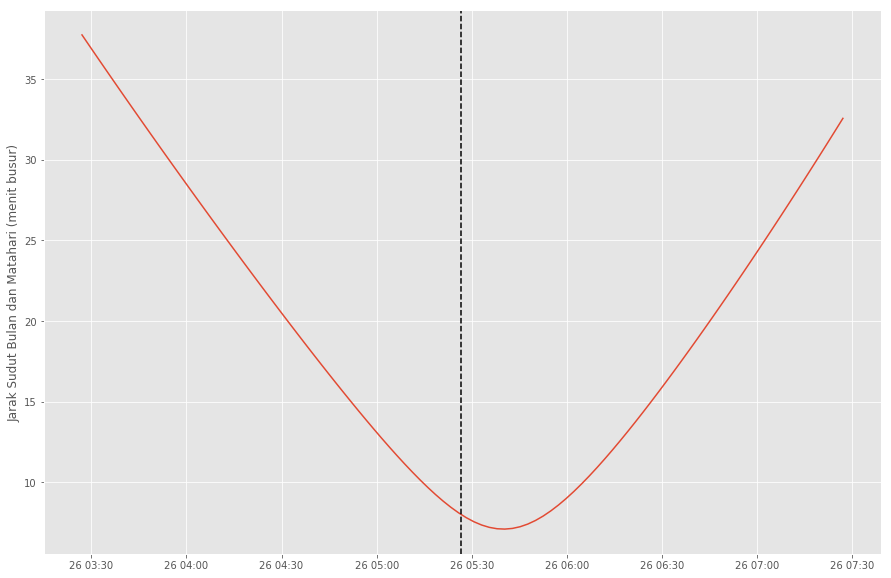

In [21]:
rentangWaktu = puncakGerhana + np.linspace(-120, 120, 100)*u.min

separasi, matahariAltAz, bulanAltAz = matahariBulan(rentangWaktu, bosscha)

plt.figure(figsize=(15, 10))
plt.plot_date(rentangWaktu.plot_date, separasi.arcmin, fmt='-')
plt.axvline(waktu_tebakan.plot_date, c='k', ls='--')
plt.ylabel('Jarak Sudut Bulan dan Matahari (menit busur)');

Apakah akan terjadi gerhana matahari cincin di waktu puncak gerhana di Observatorium Bosscha

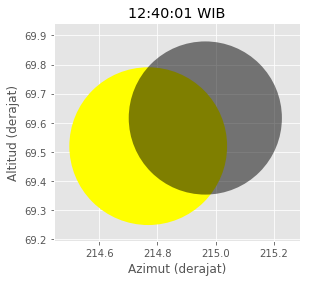

In [22]:
waktu_tebakan = rentangWaktu[np.argmin(separasi)]
rentangWaktu = waktu_tebakan + np.linspace(-5, 5, 500)*u.min
separasi = matahariBulan(rentangWaktu, bosscha)[0]
puncakGerhana = rentangWaktu[np.argmin(separasi)]

separasi, matahariAltAz, bulanAltAz = matahariBulan(puncakGerhana, bosscha)

ukuraMatahari = ukuran_tampak(R_matahari, matahariAltAz.distance)
ukuranBulan = ukuran_tampak(R_bulan, bulanAltAz.distance)

lingkaranMatahari = plt.Circle((matahariAltAz.az.deg, matahariAltAz.alt.deg), 
                        ukuranMatahari.to(u.deg).value,
                        fc='yellow')
lingkaranBulan = plt.Circle((bulanAltAz.az.deg, bulanAltAz.alt.deg), 
                         ukuranBulan.to(u.deg).value,
                         fc='black', alpha=.5)

ax = plt.subplot(aspect=1)
ax.add_patch(lingkaranMatahari)
ax.add_patch(lingkaranBulan)
jarakTerbesar = max(separasi.deg, ukuranMatahari.to(u.deg).value, ukuranBulan.to(u.deg).value)
plt.xlim(matahariAltAz.az.deg-jarakTerbesar*1.2, bulanAltAz.az.deg+jarakTerbesar*1.2)
plt.ylim(matahariAltAz.alt.deg-jarakTerbesar*1.2, bulanAltAz.alt.deg+jarakTerbesar*1.2)

plt.xlabel('Azimut (derajat)')
plt.ylabel('Altitud (derajat)')

maxdt = pytz.utc.localize(puncakGerhana.datetime).astimezone(tz)

plt.title('{0:%H}:{0:%M}:{0:%S} {1}'.format(maxdt, maxdt.tzinfo.tzname(maxdt)));

Di Observatorium Bosscha banyak pohon. Apakah ketika puncak gerhana sebagian terjadi medan pandang kita tidak terhalang pohon? Asumsi tinggi rata-rata pohon 30 meter.

In [24]:
30*u.m/np.tan(matahariAltAz.alt)

<Quantity 11.20487511 m>

Selama pengamat berjarak 12 meter dari pohon pandangan akan bebas. Aman